In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family='serif', size=15)
mpl.rc('mathtext', fontset='stix')
mpl.rc('text', usetex=True)

In [3]:
df = pd.read_csv('data_points.csv')
X, Y = df['x'].to_numpy(dtype=int), df['f(x)'].to_numpy(dtype=float)

      x             L1             L2             R
0  1910   31872.000000   91772.000000  5.990000e+04
1  1965  193081.511719  193354.493490 -1.228418e+03
2  2002   26138.748416 -233411.305984  2.128310e+06
3  2012 -136453.125184 -801550.139584  6.118893e+06


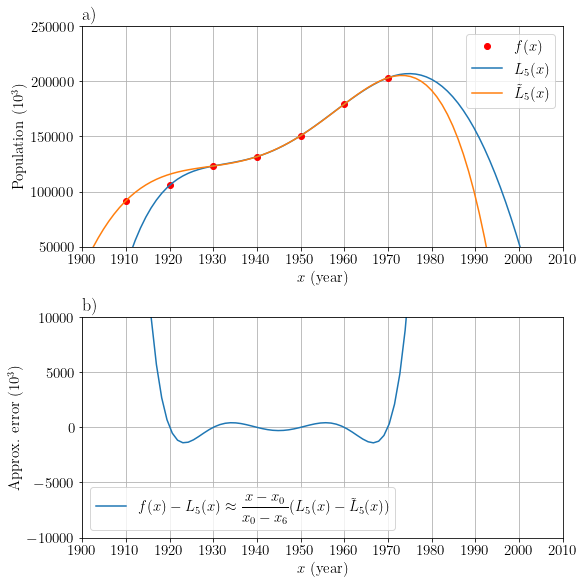

In [10]:
def lagrange_interp(X, Y, x):
    n = len(X)
    y = 0
    for i in range(n):
        l = 1
        for j in range(i):
            l *= (x - X[j]) / (X[i] - X[j])
        for j in range(i+1, n):
            l *= (x - X[j]) / (X[i] - X[j])
        y += l * Y[i]
    return y
L1 = lambda x: lagrange_interp(X[:-1], Y[:-1], x)
L2 = lambda x: lagrange_interp(X[1:], Y[1:], x)
R = lambda x: (x - X[0]) / (X[0] - X[-1]) * (L1(x) - L2(x))
out_df = pd.DataFrame([[x, L1(x), L2(x), R(x)] for x in [1910, 1965, 2002, 2012]], columns=['x', 'L1', 'L2', 'R'])

x_range = np.linspace(1900, 2020, 100)
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8), constrained_layout=True)
ax1.plot(X, Y, 'ro', label=r'$f(x)$')
ax1.plot(x_range, [L1(x) for x in x_range], label=r'$L_5(x)$')
ax1.plot(x_range, [L2(x) for x in x_range], label=r'$\tilde{L}_5(x)$')
ax1.set_title('a)', loc='left')
ax1.set_xlim(1900, 2010)
ax1.set_xticks(np.arange(1900, 2020, 10))
ax1.set_ylim(0.5e5, 2.5e5)
ax1.set_xlabel(r'$x$ (year)')
ax1.set_ylabel(r'Population ($10^3$)')
ax1.grid()
ax1.legend()

ax2.plot(x_range, [R(x) for x in x_range], label=r'$$f(x)-L_5(x)\approx \frac{x-x_0}{x_0-x_{6}}(L_5(x)-\tilde{L}_5(x))$$')
ax2.set_title('b)', loc='left')
ax2.set_xlim(1900, 2010)
ax2.set_xticks(np.arange(1900, 2020, 10))
ax2.set_ylim(-1e4, 1e4)
ax2.set_xlabel(r'$x$ (year)')
ax2.set_ylabel(r'Approx. error ($10^3$)')
ax2.grid()
ax2.legend()

fig.savefig('lagrange-interpolation.pdf')
print(out_df)

31872.0 193081.51171875 26138.748415998853 -136453.12518400417


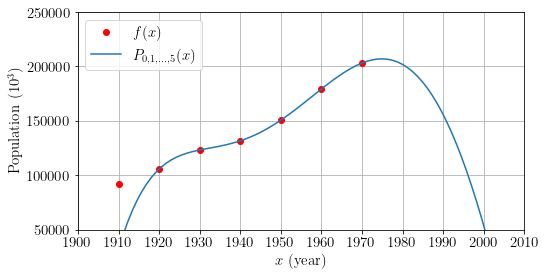

In [7]:
def neville_interp(X, Y, x):
    n = len(X)
    p = np.array(Y)
    for i in range(1, n):
        for j in range(n-i):
            p[j] = ((x - X[j]) * p[j+1] - (x - X[j+i]) * p[j]) / (X[j+i] - X[j])
    return p[0]
P = lambda x: neville_interp(X[:-1], Y[:-1], x)

x_range = np.linspace(1900, 2020, 100)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X, Y, 'ro', label=r'$f(x)$')
ax.plot(x_range, [P(x) for x in x_range], label=r'$P_{0,1,\dots,5}(x)$')
ax.set_xlim(1900, 2010)
ax.set_xticks(np.arange(1900, 2020, 10))
ax.set_ylim(0.5e5, 2.5e5)
ax.set_xlabel(r'$x$ (year)')
ax.set_ylabel(r'Population ($10^3$)')
ax.grid()
ax.legend()

fig.savefig('neville-interpolation.pdf')
print(P(1910), P(1965), P(2002), P(2012))

31872.000000000015 193081.51171875 26138.748416000046 -136453.1251840004


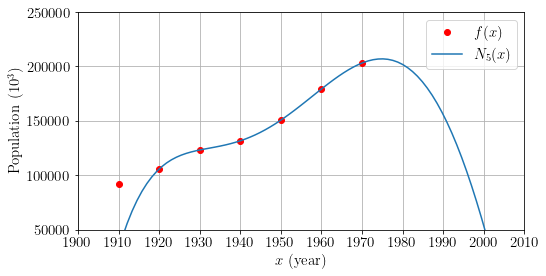

In [8]:
def divided_diff(X, Y):
    n = len(X)
    g = Y.copy()
    for i in range(1, n):
        for j in range(n-1, i-1, -1):
            g[j] = (g[j] - g[j-1]) / (X[j] - X[j-i])
    return g
def newton_interp(X, G, x):
    n = len(X)
    y = G[n-1]
    for i in range(n-2, -1, -1):
        y = G[i] + (x - X[i]) * y
    return y
G = divided_diff(X[:-1], Y[:-1])
N = lambda x: newton_interp(X[:-1], G, x)

x_range = np.linspace(1900, 2020, 100)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X, Y, 'ro', label=r'$f(x)$')
ax.plot(x_range, [N(x) for x in x_range], label=r'$N_{5}(x)$')
ax.set_xlim(1900, 2010)
ax.set_xticks(np.arange(1900, 2020, 10))
ax.set_ylim(0.5e5, 2.5e5)
ax.set_xlabel(r'$x$ (year)')
ax.set_ylabel(r'Population ($10^3$)')
ax.grid()
ax.legend()

fig.savefig('newton-interpolation.pdf')
print(N(1910), N(1965), N(2002), N(2012))